<a href="https://colab.research.google.com/github/iam-pattan/DL-lab/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras  import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train),(x_test, y_test) = datasets.cifar10.load_data()

x_train , x_test= x_train/255.0 , x_test/255.0

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout (0.2),
    tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout (0.2),
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout (0.2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout (0.2),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
model.compile(optimizer='adam',
loss=loss_fn,
metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=64, epochs=15)

Epoch 1/15
782/782 [==============================] - 53s 68ms/step - loss: 0.4999 - accuracy: 0.8260 - val_loss: 0.6164 - val_accuracy: 0.7923
Epoch 2/15
782/782 [==============================] - 53s 68ms/step - loss: 0.4827 - accuracy: 0.8302 - val_loss: 0.5938 - val_accuracy: 0.7993
Epoch 3/15
782/782 [==============================] - 53s 68ms/step - loss: 0.4802 - accuracy: 0.8316 - val_loss: 0.6019 - val_accuracy: 0.8045
Epoch 4/15
782/782 [==============================] - 53s 68ms/step - loss: 0.4698 - accuracy: 0.8369 - val_loss: 0.6174 - val_accuracy: 0.7940
Epoch 5/15
782/782 [==============================] - 53s 68ms/step - loss: 0.4593 - accuracy: 0.8382 - val_loss: 0.5962 - val_accuracy: 0.8004
Epoch 6/15
782/782 [==============================] - 53s 68ms/step - loss: 0.4560 - accuracy: 0.8404 - val_loss: 0.5816 - val_accuracy: 0.8070
Epoch 7/15
782/782 [==============================] - 53s 68ms/step - loss: 0.4496 - accuracy: 0.8430 - val_loss: 0.5952 - val_accuracy:

In [ ]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 4s - loss: 0.6056 - accuracy: 0.8013


[0.6056419014930725, 0.8012999892234802]

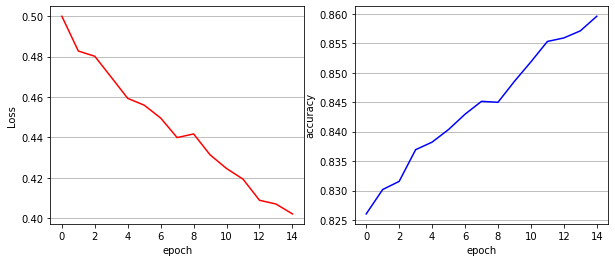

In [ ]:
#plot
figure= plt.figure(figsize=(10,4))
ax = plt.subplot(121)
ax.plot(history.history['loss'], 'r')
plt.grid(axis='y')
plt.xlabel("epoch")
plt.ylabel("Loss")
ax2 = plt.subplot(122)
ax2.plot(history.history['accuracy'], 'b')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid(axis='y')
#plt.savefig("cifar10")

Training accuracy of `85.96`

Validation accuracy of `80.13`